In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (20, 12)
%matplotlib inline

In [8]:
PATH = '../data/'
data_file = 'train.csv'
data = pd.read_csv(os.path.join(PATH, data_file))#.set_index('Image')

In [9]:
data.columns = ['Image', 'Whale_ID']
data.head(10)


,Image,Whale_ID
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale
5,0006e997e.jpg,new_whale
6,000a6daec.jpg,w_dd88965
7,000f0f2bf.jpg,new_whale
8,0016b897a.jpg,w_64404ac
9,001c1ac5f.jpg,w_a6f9d33


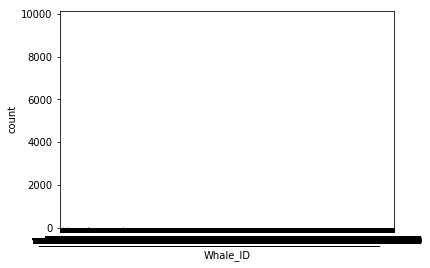

In [4]:
ax = sns.countplot(x="Whale_ID", data=data)
# _,_ = plt.hist(np.unique(data.Id.values),bins=100)
# _,_ = plt.hist(data.Id.nunique(), bins=100)

In [13]:
data.loc[:,('Whale_ID')].str.strip()
inp = data[data['Whale_ID']!='new_whale']
inp['Whale_ID'].value_counts()

w_23a388d    73
w_9b5109b    65
w_9c506f6    62
w_0369a5c    61
w_700ebb4    57
w_3de579a    54
w_564a34b    51
w_fd3e556    50
w_88e4537    49
w_2b069ba    48
w_d405854    47
w_789c969    45
w_f0fe284    45
w_343f088    40
w_5e8e218    40
w_778e474    40
w_60ce6fc    37
w_a9304b9    37
w_5a2634c    37
w_6822dbc    36
w_af367c3    35
w_f765256    34
w_1ca9ab1    34
w_17b0d3a    33
w_d72771c    32
w_08630fd    31
w_8c25681    31
w_6cda039    31
w_04003e9    30
w_51fc1fc    30
             ..
w_58ddf90     1
w_f8dc1cc     1
w_a763725     1
w_169253a     1
w_f6bae1a     1
w_6d1f159     1
w_b535cbd     1
w_3853f4b     1
w_e1b8378     1
w_b2ef717     1
w_a54ea89     1
w_03ea6f9     1
w_afe18e4     1
w_a96ebe6     1
w_01fc429     1
w_ae8bd64     1
w_a4d8d43     1
w_362ebae     1
w_668c588     1
w_9072933     1
w_0fb38fe     1
w_30719c8     1
w_931b78f     1
w_d063697     1
w_fc6f897     1
w_8ad632d     1
w_1eb67e3     1
w_dfdfeeb     1
w_b6de8e1     1
w_6ee9b69     1
Name: Whale_ID, Length: 

Deci sunt **Name: Whale_ID, Length: 5004, dtype: int64** 5004 clase diferite

Analizam cate apar o data, de doua ori, samd

In [17]:
stats_inp = pd.DataFrame(inp['Whale_ID'].value_counts()).reset_index()
stats_inp.columns=['Whale_ID','Whale_freq']
stats_inp.head()
# stats_inp[stats_inp.Whale_]

,Whale_ID,Whale_freq
0,w_23a388d,73
1,w_9b5109b,65
2,w_9c506f6,62
3,w_0369a5c,61
4,w_700ebb4,57


In [30]:

def display_training_imgs_by_class():
    rows = 1
    while display_training_imgs_by_class.class_count < 100:
        rows,_ = stats_inp[stats_inp.Whale_freq == display_training_imgs_by_class.class_count].shape
        if rows != 0:
            yield '{rows},{freq}\n'.format(rows=rows,freq=display_training_imgs_by_class.class_count)
        display_training_imgs_by_class.class_count += 1

display_training_imgs_by_class.class_count = 1
f = open('images_per_class.csv','w')
f.write('Num_of_classes,Num_training_imgs\n')
for result in display_training_imgs_by_class():
    f.write(result)
f.close()

Deci pentru 2073 clase exista o singura imagine de antrenare

new_whale apare de 9664. Pentru celelalte valori redam distributia frecventei de aparitie a unui individ, pentru toti indivizii, ca in figura.

------insert fig

tabelar, in ordinea descrescatoare a aparitiei aceste frecvente sunt:
\begin{tabular}{|c|c|}
new_whale  &  9664
w_23a388d  &    73
w_9b5109b  &    65
w_9c506f6  &    62
w_0369a5c  &    61
w_700ebb4  &    57
w_3de579a  &    54
w_564a34b  &    51
w_fd3e556  &    50
w_88e4537  &    49
w_2b069ba  &    48
w_d405854  &    47
w_789c969  &    45
w_f0fe284  &    45
w_343f088  &    40
w_778e474  &    40
w_5e8e218  &    40
w_5a2634c  &    37
w_60ce6fc  &    37
w_a9304b9  &    37
w_6822dbc  &    36
w_af367c3  &    35
w_1ca9ab1  &    34
w_f765256  &    34
w_17b0d3a  &    33
w_d72771c  &    32
w_6cda039  &    31
w_08630fd  &    31
w_8c25681  &    31
w_51fc1fc  &    30
           &  ... 
w_b7ad0fb  &     1
w_f8b7f05  &     1
w_59f4653  &     1
\cdots     &     \cdots
\end{tabular}

In [24]:
d = pd.DataFrame(data['Whale_ID'].value_counts())
d[d.Whale_ID<=5].shape
# 2073 rows

(4371, 1)

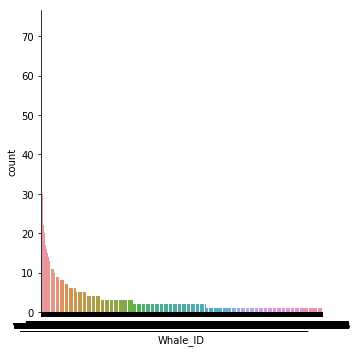

In [7]:
#xa = sns.countplot(x="Whale_ID", data=inp)
a = sns.catplot(x="Whale_ID",
                data=inp, kind="count",
                legend_out=True, aspect=1,
                order = inp['Whale_ID'].value_counts().index);
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [10]:
#data.groupby('Whale_ID').nunique()
viz = pd.DataFrame(inp['Whale_ID'].value_counts()

w_23a388d    73
w_9b5109b    65
w_9c506f6    62
w_0369a5c    61
w_700ebb4    57
w_3de579a    54
w_564a34b    51
w_fd3e556    50
w_88e4537    49
w_2b069ba    48
w_d405854    47
w_789c969    45
w_f0fe284    45
w_778e474    40
w_343f088    40
w_5e8e218    40
w_5a2634c    37
w_60ce6fc    37
w_a9304b9    37
w_6822dbc    36
w_af367c3    35
w_1ca9ab1    34
w_f765256    34
w_17b0d3a    33
w_d72771c    32
w_08630fd    31
w_8c25681    31
w_6cda039    31
w_51fc1fc    30
w_fd6a3ad    30
             ..
w_527aa02     1
w_81eb375     1
w_92cb156     1
w_14f15a0     1
w_efc5e07     1
w_cc9dfb5     1
w_9d5968b     1
w_6332313     1
w_54c535e     1
w_974c37d     1
w_fcdda4c     1
w_c9a569d     1
w_0adb403     1
w_cd2d796     1
w_bf2ee79     1
w_6301785     1
w_2330989     1
w_939a3c7     1
w_c69c9be     1
w_2757c07     1
w_f2571bd     1
w_7c718f4     1
w_a65abbf     1
w_bfecb74     1
w_c720f04     1
w_a3dc2bd     1
w_fbe3f59     1
w_527a019     1
w_fd4376a     1
w_9f30885     1
Name: Whale_ID, Length: 